<a href="https://colab.research.google.com/github/a-singh03/BDDA/blob/main/BDDA_Project_Group1_Pipeline_%26_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BDDA PROJECT 1**

Submitted By:

Ankita Singh - 035011

Anmol Bhardwaj - 035012

Shruti Tiwari - 035052

**Objective: To perform data pre-processing and build a RandomForestClassifier through a pipeline.**

**1. Importing the Libraries**

Dataset: https://www.kaggle.com/datasets/alirezahasannejad/loanstatus

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from pathlib import Path

**2. Reading the file**

In [55]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [56]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [57]:
pathToFolder = "/gdrive/MyDrive/BDDA1"

In [58]:
path = Path(pathToFolder) / "loanstatus.csv"

In [59]:
df = pd.read_csv(path)

**3. Data Exploration**

In [60]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df.shape

(614, 13)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [63]:
cat_col = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']
noncat_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

*3.1 Count statistics of the categorical variables and Data visualization*

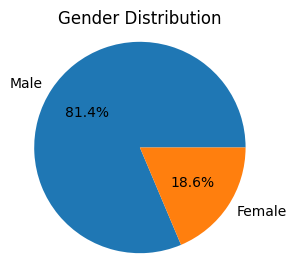

In [64]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Gender Distribution")
plt.show();

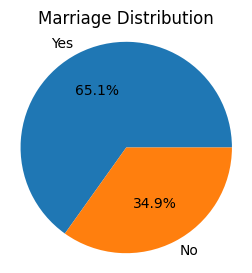

In [65]:
plt.figure(figsize=(3, 3))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Marriage Distribution")
plt.show();

In [66]:
df['Education'].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

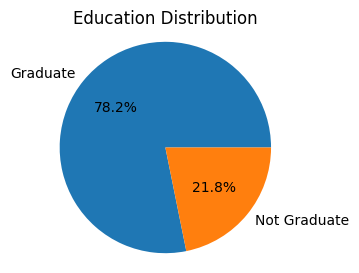

In [67]:
plt.figure(figsize=(3, 3))
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Education Distribution")
plt.show();

In [68]:
vc = df['Dependents'].value_counts()

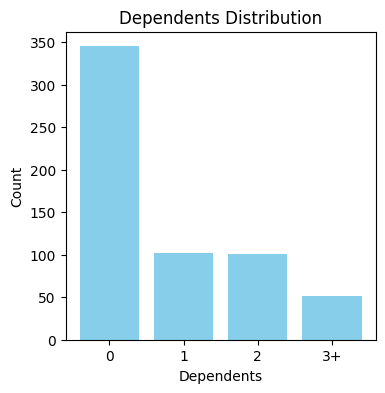

In [69]:
plt.figure(figsize=(4, 4))
plt.bar(vc.index, vc.values, color='skyblue')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependents Distribution')
plt.xticks(rotation=0)  # Keep x-axis labels vertical
plt.show();

In [70]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

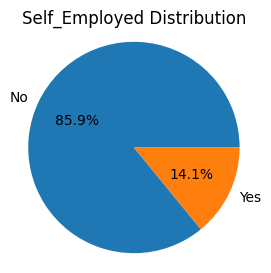

In [71]:
plt.figure(figsize=(3, 3))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Self_Employed Distribution")
plt.show();

In [72]:
va = df['Property_Area'].value_counts()

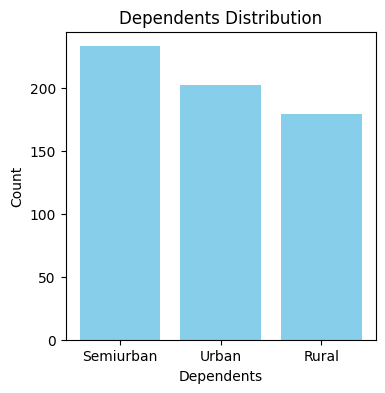

In [73]:
plt.figure(figsize=(4, 4))
plt.bar(va.index, va.values, color='skyblue')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependents Distribution')
plt.xticks(rotation=0)  # Keep x-axis labels vertical
plt.show();

*3.2 Descriptive statisics of the numeric variables and Data Visualization*

In [74]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: >

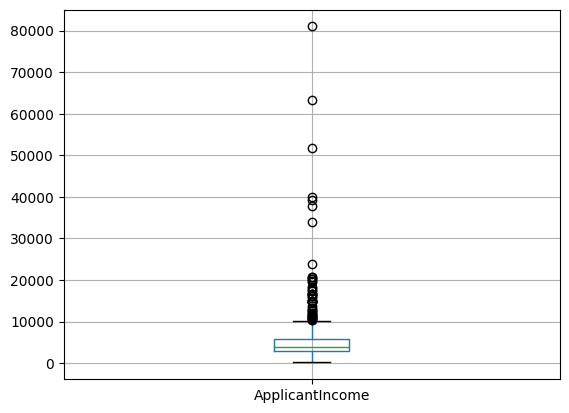

<Axes: >

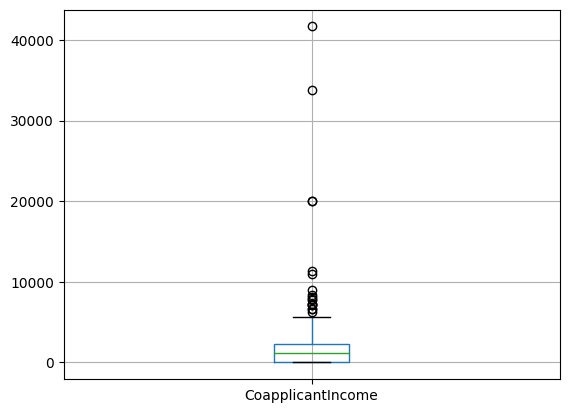

<Axes: >

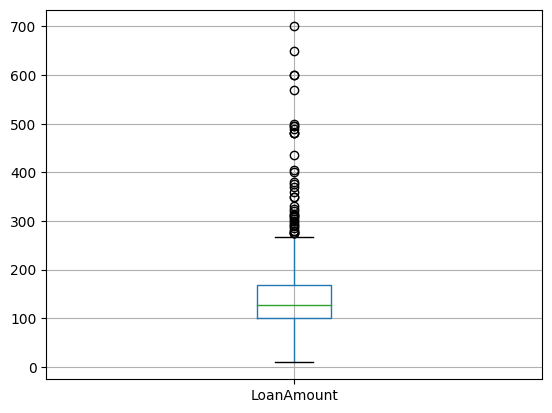

<Axes: >

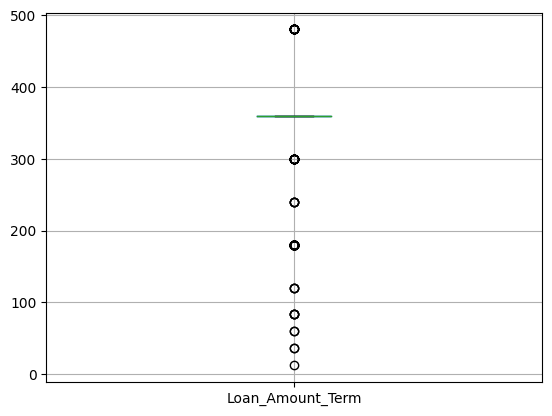

<Axes: >

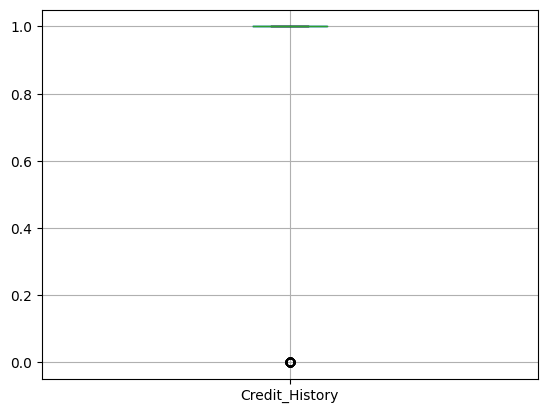

In [99]:
for column in noncat_col:
    df.boxplot(column=column)
    plt.show()

<ipython-input-103-11d9ea6340b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


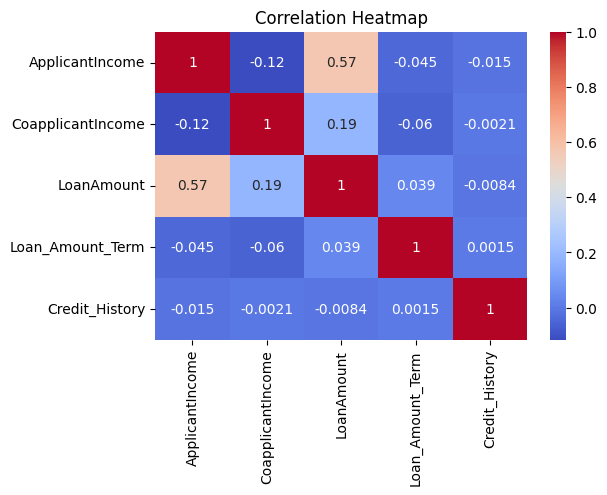

In [103]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show();

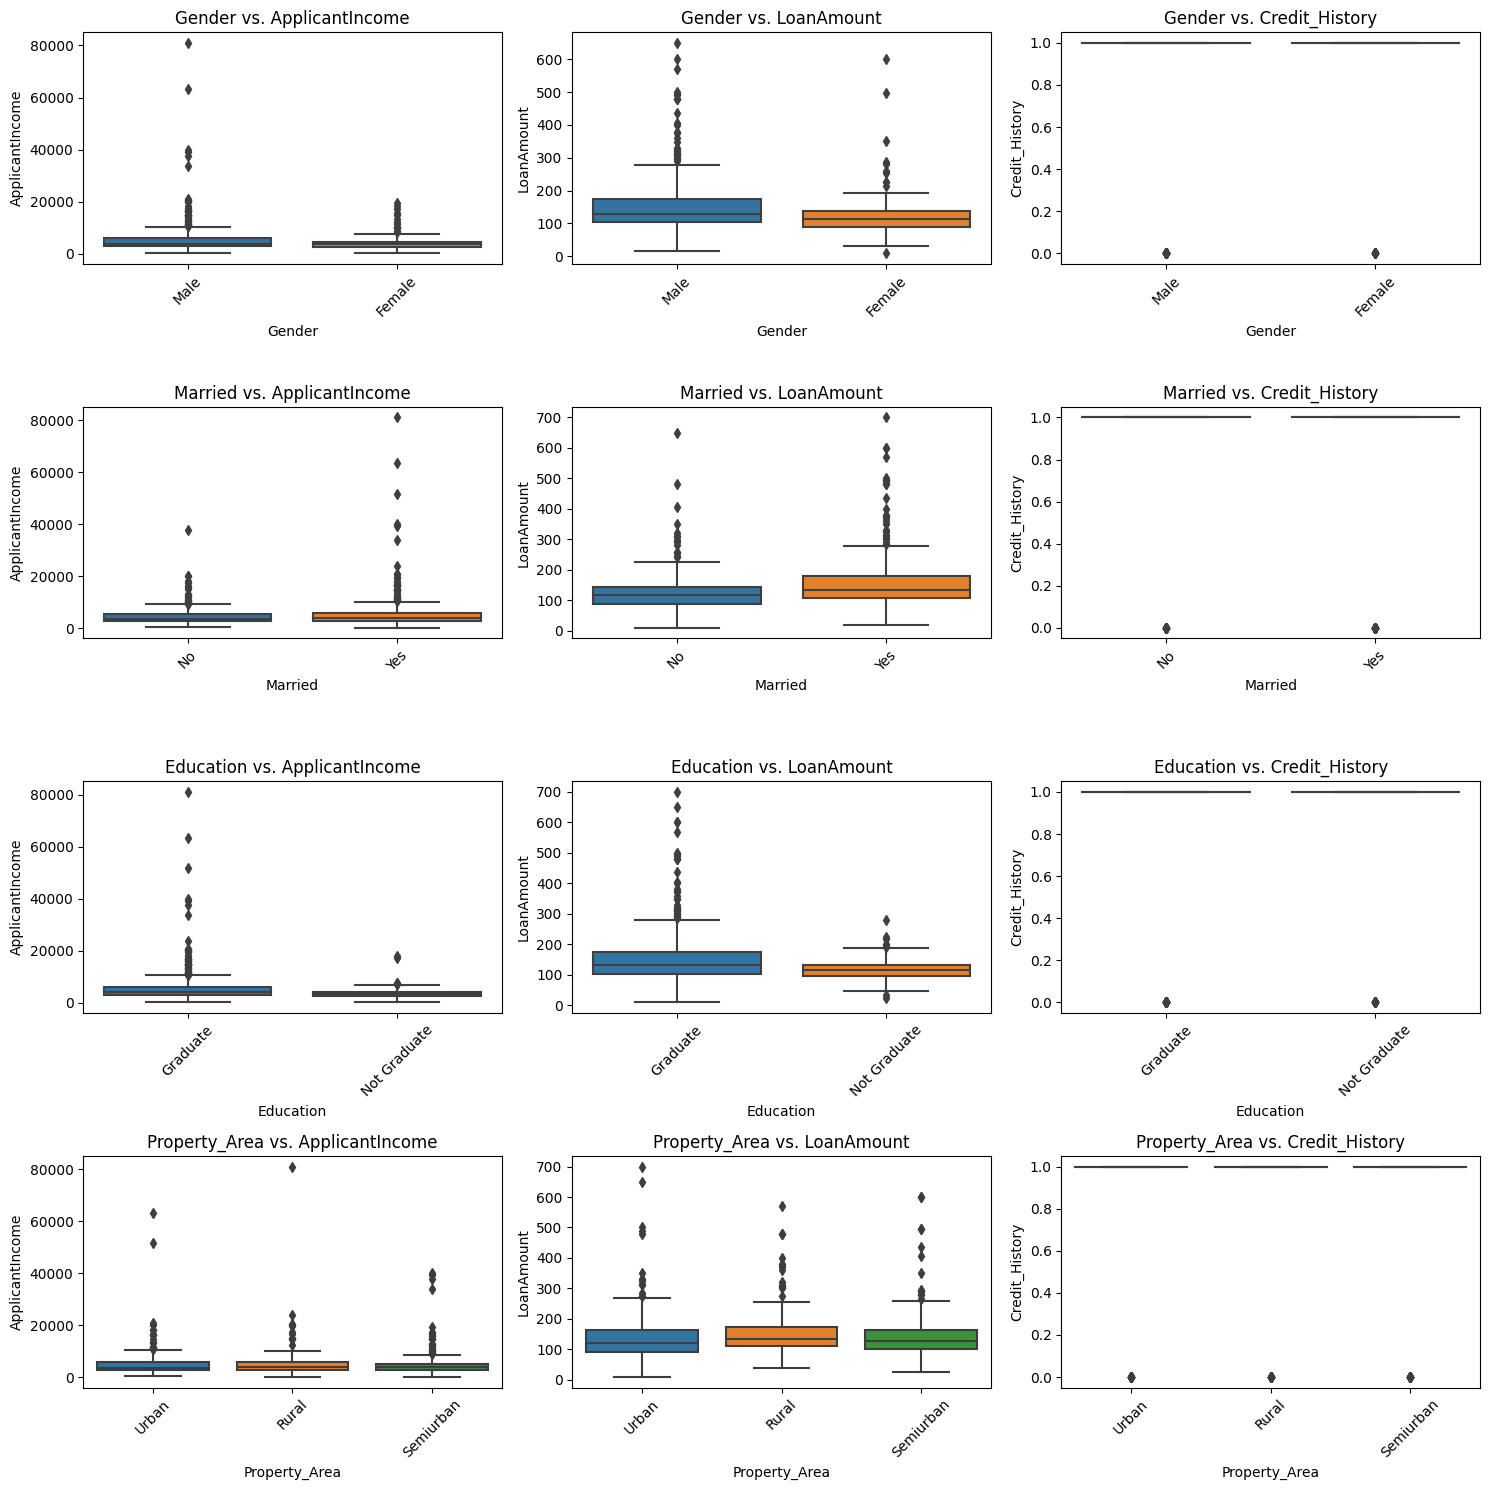

In [111]:
important_categorical_columns = ['Gender', 'Married', 'Education','Property_Area' ]
important_numerical_columns = ['ApplicantIncome', 'LoanAmount', 'Credit_History']

plt.figure(figsize=(15, 15))

for i, cat_column in enumerate(important_categorical_columns, 1):
    for j, num_column in enumerate(important_numerical_columns, 1):
        subplot_index = (i - 1) * len(important_numerical_columns) + j
        plt.subplot(len(important_categorical_columns), len(important_numerical_columns), subplot_index)
        sns.boxplot(x=cat_column, y=num_column, data=df)
        plt.title(f'{cat_column} vs. {num_column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
plt.show();

*3.3 Null value identification*

In [75]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**4. Deciding the target variable**

In [77]:
y = df.pop('Loan_Status')

In [78]:
x = df
x.pop("Loan_ID")
x

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


**5. Splitting the data into Training and Testing dataset**

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 11)

**6. Making a pipeline to:**

      a. Impute the null values with Mode for categorical variables and Median for numeric variables.
      b. Scaling the numeric variables.
      c.Encoding the categorical variables.
      d. Building a RandomForestClassifier model.

*Since the data has both, categorical variables and non-categorical variables with null values, we build two different pipelines. One to impute the null values in categorical variables using the Mode strategy and then to encode them and other to impute the null values in non-categorical variables with Median as the strategy and then scale the values.*

In [80]:
num_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
cat_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [81]:
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, noncat_col),
                    ('cat', cat_transformer, cat_col)])

In [82]:
model_name = RandomForestClassifier()

*5.1 Making the pipeline*

In [83]:
pipe = make_pipeline(preprocessor,model_name)

In [84]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('randomforestclassifier', RandomForestClassifier())])

*5.2 Fitting the data*

In [85]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('randomforestclassifier', RandomForestClassifier())])

*5.3 Prediction*

In [86]:
pred= pipe.predict(x_test)

*5.4 Accuracy score*

In [87]:
accu = accuracy_score(y_test,pred)
accu

0.7922077922077922

In [88]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           N       0.83      0.54      0.65        56
           Y       0.78      0.94      0.85        98

    accuracy                           0.79       154
   macro avg       0.81      0.74      0.75       154
weighted avg       0.80      0.79      0.78       154



**1. Precision:** Precision measures the proportion of correctly predicted positive instances (True Positives) out of all instances predicted as positive (True Positives + False Positives). In this model:

a. For class 'N', precision is 0.83. This means that when the model predicts 'N', it is correct 83% of the time.

b. For class 'Y', precision is 0.78. When the model predicts 'Y', it is correct 78% of the time.


**2. Recall (Sensitivity or True Positive Rate):** Recall measures the proportion of correctly predicted positive instances (True Positives) out of all actual positive instances (True Positives + False Negatives). In the model:

a. For class 'N', recall is 0.54. This means that the model is able to correctly identify 54% of all instances of class 'N'.

b. For class 'Y', recall is 0.94. The model is able to correctly identify 94% of all instances of class 'Y'.


**3. F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance. In the model:

a. For class 'N', the F1-score is 0.65. It represents a balance between precision and recall for class 'N'.

b. For class 'Y', the F1-score is 0.85. It indicates a good balance between precision and recall for class 'Y'.


**4. Support:** Support indicates the number of occurrences of each class in the test dataset. In the report:

a. Support for class 'N': 56 instances

b. Support for class 'Y': 98 instances


**5. Accuracy:** Accuracy measures the overall correctness of the model's predictions. It's the ratio of correctly predicted instances to the total number of instances. In the model:

Accuracy: 0.79 (79%)


In conclusion, the model demonstrates reasonable performance in predicting class 'Y', with high recall and an F1-score of 0.85. However, there is room for improvement in predicting class 'N', as indicated by the lower recall and F1-score for that class. The overall accuracy of 79% suggests that the model provides a good generalization of the data, but there is potential for further optimization and refinement to achieve a more balanced performance across both classes.

In [89]:
y_train_binary = np.where(y_train == "Y", 1, 0)

In [90]:
y_test_binary = np.where(y_test == "Y", 1, 0)

In [91]:
pipe.fit(x_train, y_train_binary)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [92]:
# Predicting probabilities for class 1 ("Y")
y_score = pipe.predict_proba(x_test)[:, 1]

In [93]:
# Calculating ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test_binary, y_score)
roc_auc = auc(fpr, tpr)

*5.4 Plotting the ROC Curve*

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

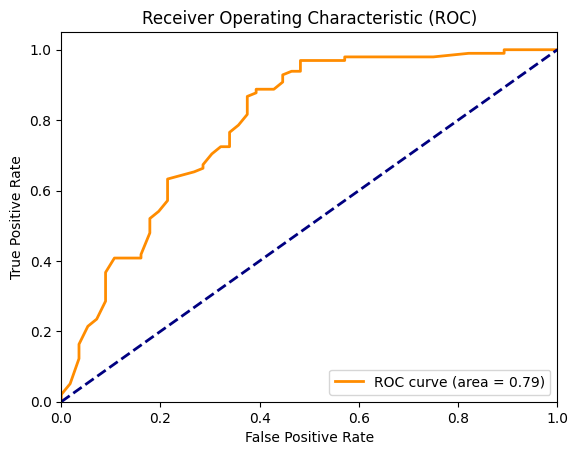

In [94]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

*5.5 Feature Importance*

In [95]:
feature_importances = model_name.feature_importances_

# Print the shape and feature importances
print("Feature importances shape:", feature_importances.shape)
print("\n---Feature importances---\n")
print(feature_importances)

Feature importances shape: (20,)

---Feature importances---

[0.18941883 0.11541304 0.18652946 0.0447025  0.21257572 0.0146294
 0.01227149 0.01718002 0.01786465 0.02100038 0.01884951 0.01400566
 0.0153834  0.01652315 0.01697779 0.01194386 0.01336819 0.02179905
 0.02215707 0.01740683]


In [96]:
#Map one-hot encoded columns back to original categorical columns
original_columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area','Credit_History']
importance_per_column = {}

for original_col in original_columns:
    related_cols = [col for col in x_train.columns if original_col in col]
    total_importance = sum(feature_importances[x_train.columns.get_loc(col)] for col in related_cols)
    num_related_cols = len(related_cols)
    average_importance = total_importance / num_related_cols
    importance_per_column[original_col] = average_importance

remaining_cols = [col for col in x_train.columns if col not in original_columns]
remaining_importance = [feature_importances[x_train.columns.get_loc(col)] for col in remaining_cols]

# Print the aggregated importance values for original columns
for col, importance in importance_per_column.items():
    print(f"{col}: {importance}")

# Print the importance values for the remaining columns
for col, importance in zip(remaining_cols, remaining_importance):
    print(f"{col}: {importance}")


Gender: 0.18941883121685776
Married: 0.11541304212759818
Dependents: 0.18652945856252118
Education: 0.044702501237883385
Self_Employed: 0.21257571900127373
Property_Area: 0.01884951172941505
Credit_History: 0.021000378247327166
ApplicantIncome: 0.01462940127971393
CoapplicantIncome: 0.012271492576322896
LoanAmount: 0.017180021074229827
Loan_Amount_Term: 0.017864654643966107


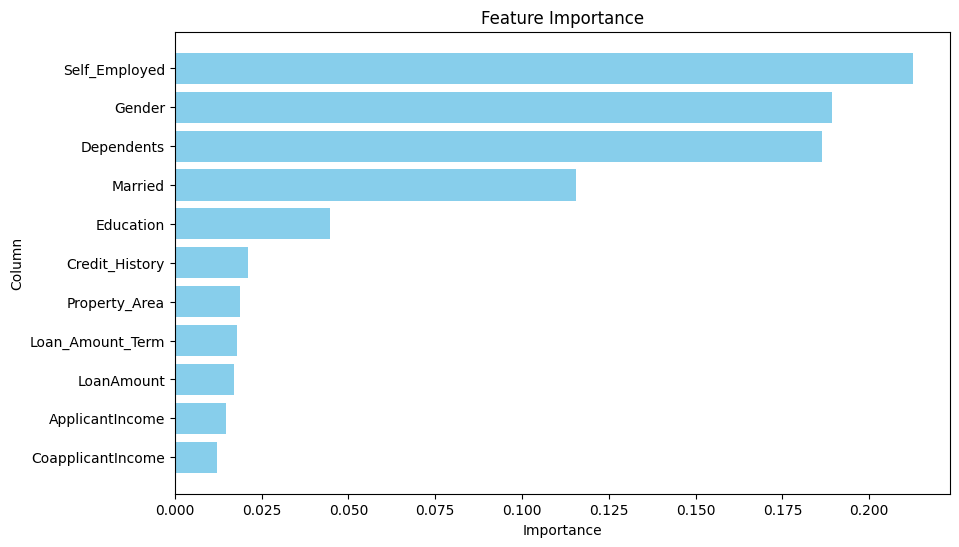

In [97]:
all_columns = original_columns + remaining_cols

# Create a list of all importance values (original and remaining)
all_importance = [importance_per_column.get(col, importance) for col in original_columns] + remaining_importance

sorted_indices = np.argsort(all_importance)[::-1]
sorted_columns = [all_columns[i] for i in sorted_indices]
sorted_importance = [all_importance[i] for i in sorted_indices]

# Plot a horizontal bar graph of all columns and their importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_columns, sorted_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Column')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show();

**THE END**